<font size ='7'>30 Days of ML !</font>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/30-days-of-ml/sample_submission.csv
/kaggle/input/30-days-of-ml/train.csv
/kaggle/input/30-days-of-ml/test.csv


# 1. Data Overview

<font size='3'>The dataset is used for this competition is synthetic, but based on a real dataset. The original dataset deals with predicting the amount of an insurance claim. Although the features are anonymized, they have properties relating to real-world features.</font>

# 2. Exploratory Data Analysis

## 2.1. Import Library

In [2]:
# Scientific Libraries
import pandas as pd
pd. set_option("display.max_columns", None) # to display all columns
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('fivethirtyeight')
# Plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
# Booster for rendering
import plotly.io as pio
pio.renderers.default = 'iframe'

# Warning ignorance
import warnings
warnings.filterwarnings('ignore')

# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, RobustScaler, OrdinalEncoder

# Selection
from scipy.stats import chi2_contingency

# Splitting the data into Train and Test
from sklearn.model_selection import train_test_split

# Machine Learning Algorithm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score,KFold

# Metrics Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## 2.2. Load Dataset

First thing, I load the dataset, both train and test, then display a few of rows.

In [3]:
# Import train dataset
train = pd.read_csv('/kaggle/input/30-days-of-ml/train.csv')
# Import test dataset
test = pd.read_csv('/kaggle/input/30-days-of-ml/test.csv')

## 2.3. Preview Dataframe

In [4]:
# Display top 5 rows train dataset
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [5]:
# Display top 5 rows test dataset
test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,B,B,B,C,B,B,A,E,E,I,0.296227,0.686757,0.587731,0.392753,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
1,5,A,B,A,C,B,C,A,E,C,H,0.543707,0.364761,0.452967,0.929645,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
2,15,B,A,A,A,B,B,A,E,D,K,0.408961,0.296129,0.690999,0.740027,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
3,16,B,B,A,C,B,D,A,E,A,N,1.031239,0.356062,0.303651,0.895591,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
4,17,B,B,A,C,B,C,A,E,C,F,0.530447,0.729004,0.281723,0.444698,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412


Train data includes target columns, but not for the test data, because we will predict the target for test data. For data pre-processing, I would like to combine both train and test data to ease for building machine learning project. Both of datas should be cleaned and no missing value is a must. I will use train data to validate the model, then I predict the target for the test data.

In [6]:
# Combine both of datas

# Create new column to ease to separate between train and test data
#test['target'] = 0
#test['train_or_test'] = 'ts'
#train['train_or_test'] = 'tr'

# Concat the data
#combine = pd.concat([train,test])

## 2.4. Data Information

In [7]:
# Get information from train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [8]:
# Get information from test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cat0    200000 non-null  object 
 2   cat1    200000 non-null  object 
 3   cat2    200000 non-null  object 
 4   cat3    200000 non-null  object 
 5   cat4    200000 non-null  object 
 6   cat5    200000 non-null  object 
 7   cat6    200000 non-null  object 
 8   cat7    200000 non-null  object 
 9   cat8    200000 non-null  object 
 10  cat9    200000 non-null  object 
 11  cont0   200000 non-null  float64
 12  cont1   200000 non-null  float64
 13  cont2   200000 non-null  float64
 14  cont3   200000 non-null  float64
 15  cont4   200000 non-null  float64
 16  cont5   200000 non-null  float64
 17  cont6   200000 non-null  float64
 18  cont7   200000 non-null  float64
 19  cont8   200000 non-null  float64
 20  cont9   200000 non-null  float64
 21  cont10  20

<font size ='4'>**Summary :**</font>  
- We can conclude that both of datas have no missing values
- There are 3 data types, such as float, int, & object
- The target is column `Target`, others are called features


## 2.5. Duplicated Values

In [9]:
# Identify duplicated values based on all columns
print(train.duplicated().sum()) # train data
print(test.duplicated().sum())  # test data

0
0


In [10]:
# Identify duplicated values based on selected column
print(train.duplicated(subset='id').sum()) # train data
print(test.duplicated(subset='id').sum())  # test data

0
0


<font size ='4'>**Summary :**</font>  
- We can conclude that both of datas have no duplicated values
- All rows are unique

## 2.6. Separate numerical & categorical features

In [11]:
# Numerical
nums = train.select_dtypes(exclude='object').keys().tolist()
# Categorical
cats = train.select_dtypes(include='object').keys().tolist()

In [12]:
print('List of Numerical Columns :\n',nums,'\n')
print('List of Categorical Columns :\n',cats,'\n')

List of Numerical Columns :
 ['id', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'target'] 

List of Categorical Columns :
 ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9'] 



I will drop columns `id` from numerical.

In [13]:
# Remove column id
nums.remove('id')

## 2.7. Univariate Analysis  
<font size='3'>I will use train data to do univariate analysis to see the pattern.</font>

### 2.7.1 Descriptive Statistic

In [14]:
# Numerical features
train[nums].describe()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


<font size ='4'>**Summary :**</font>  
- the mean of features are almost the same, around 0.46 - 0.53
- the distribution of target is indicated skewed, because it seems has outlier values
- the distribution of features look normal, because the mean and median value are closed, except for `cont 4` indicated right skewed, mean is greater than median value. Let' see in the next visualizaion.
- there are 6 of 14 features in numerical which have minus for minimum value, namely `cont 0`. `cont 1`, `cont 2`, `cont 6`, `cont 8`, & `cont 12`.

In [15]:
# Categorical features 
train[cats].describe()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000
unique,2,2,2,4,4,4,8,8,7,15
top,A,A,A,C,B,B,A,E,C,F
freq,193130,154824,253886,263356,294737,149340,290511,276040,111103,71249


<font size ='4'>**Summary :**</font>  
- column `cat 9` has high cardinality. If we use one-hot encode in this large dataset, it can expand the size of dataset, so the options are to drop or to use ordinal encoding

### 2.7.2 Histogram Plot

In [16]:
len(nums)

15

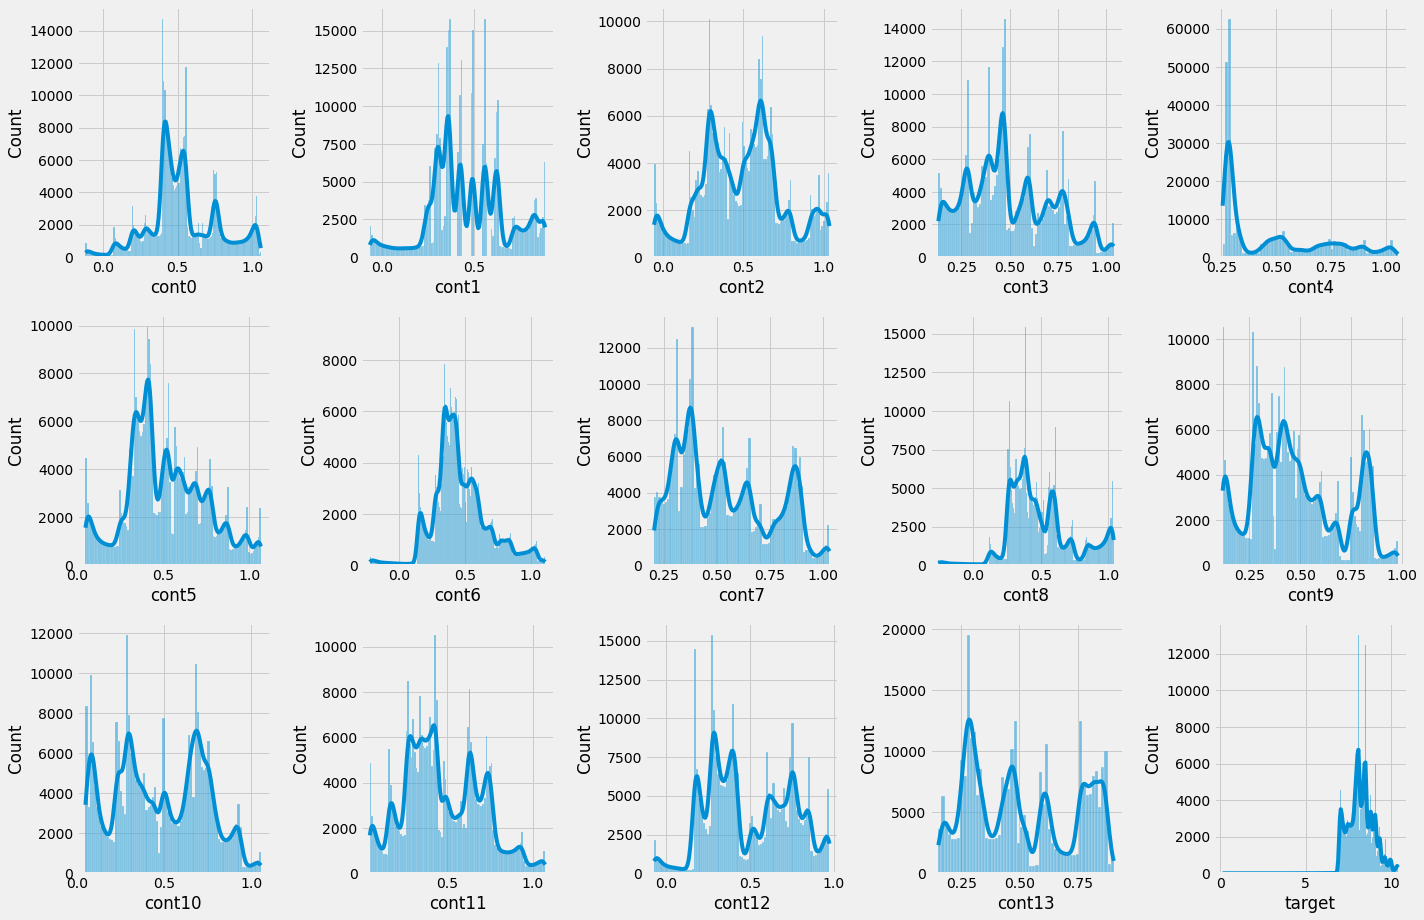

In [17]:
plt.figure(figsize=(20,13))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/3, i+1)
    sns.histplot(train[nums[i]], kde = True);
    plt.tight_layout();

<font size ='4'>**Summary :**</font>  
- the distribution of target is left skewed, maybe because there are outlier values. Let's check in Box Plot visulization
- My assumption which indicated the right-skewed distribution of column `cont 4` is true .

### 2.7.3 Box Plot

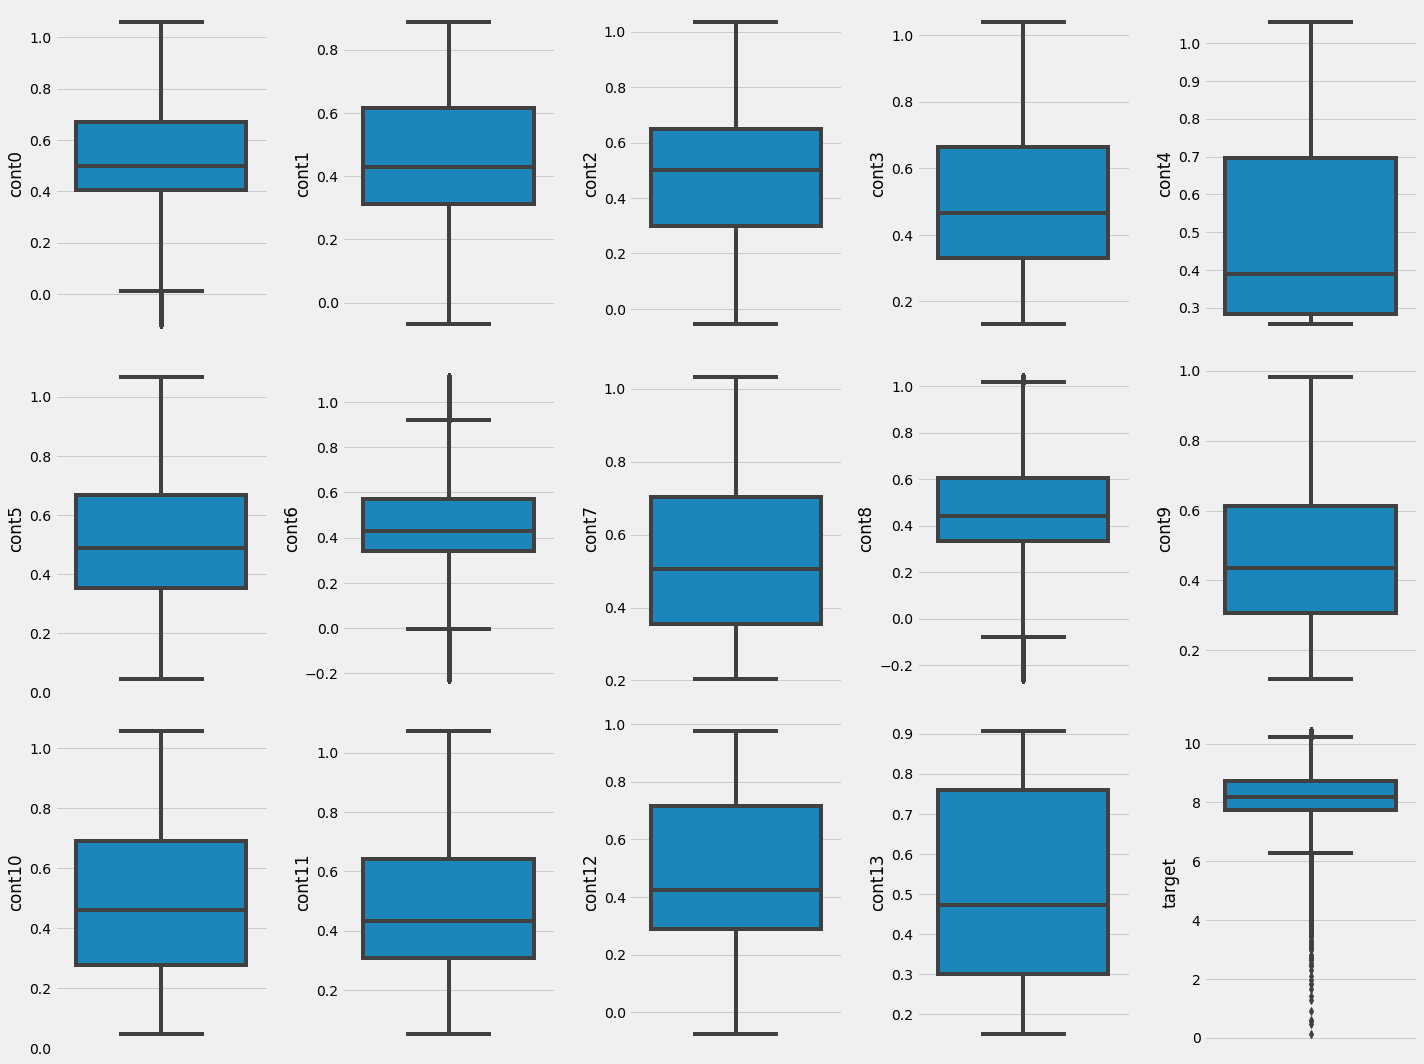

In [18]:
plt.figure(figsize=(20,15))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/3, i+1)
    sns.boxplot(y = train[nums[i]]);
    plt.tight_layout();

<font size ='4'>**Summary :**</font>  
- That's true that target has outlier values. We can clearly see that 50 percentile of target lie between the value of around 7.9 & 8.9 and the median aroud 8.1
- There are some outliers in columns `cont 0`, `cont 6`, & `cont 8`. Let's count the total of outliers. 

In [19]:
# Identify total outlier using IQR
for col in nums:
    
    # Menghitung nilai IQR
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define value 
    nilai_min = train[col].min()
    nilai_max = train[col].max()
    lower_lim = Q1 - (1.5*IQR)
    upper_lim = Q3 + (1.5*IQR)
    
    # Identify low outlier

    if (nilai_min < lower_lim):
        print('Low outlier is found in column',col,'<', lower_lim,'\n')
        #display total low outlier 
        print('Total of Low Outlier in column',col, ':', len(
            list(train[train[col] < lower_lim].index)),'\n')
    elif (nilai_max > upper_lim):
        print('High outlier is found in column',col,'>', upper_lim,'\n')
        #display total high outlier 
        print('Total of High Outlier in column',col, ':', len(
            list(train[train[col] > upper_lim].index)),'\n')
        
    else:
        print('Outlier is not found in column',col,'\n')   

Low outlier is found in column cont0 < 0.012823421983111871 

Total of Low Outlier in column cont0 : 4480 

Outlier is not found in column cont1 

Outlier is not found in column cont2 

Outlier is not found in column cont3 

Outlier is not found in column cont4 

Outlier is not found in column cont5 

Low outlier is found in column cont6 < -0.002891285813820199 

Total of Low Outlier in column cont6 : 3823 

Outlier is not found in column cont7 

Low outlier is found in column cont8 < -0.07786881714112237 

Total of Low Outlier in column cont8 : 3053 

Outlier is not found in column cont9 

Outlier is not found in column cont10 

Outlier is not found in column cont11 

Outlier is not found in column cont12 

Outlier is not found in column cont13 

Low outlier is found in column target < 6.26222674563661 

Total of Low Outlier in column target : 458 



Total outliers in train data are almost 40%. It's a lot !

### 2.7.4. Count Plot & Pie Chart for Categorical

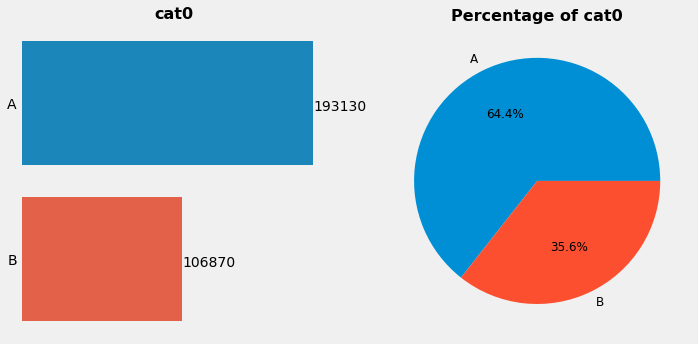

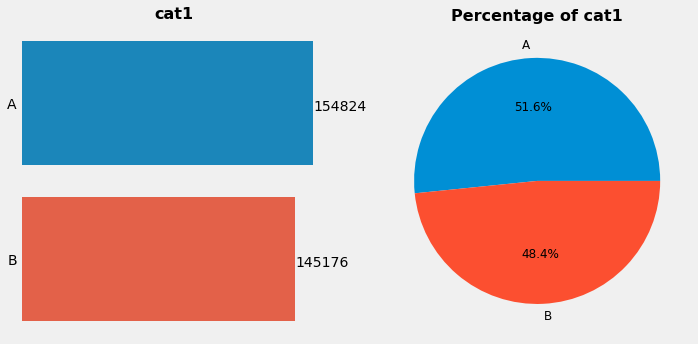

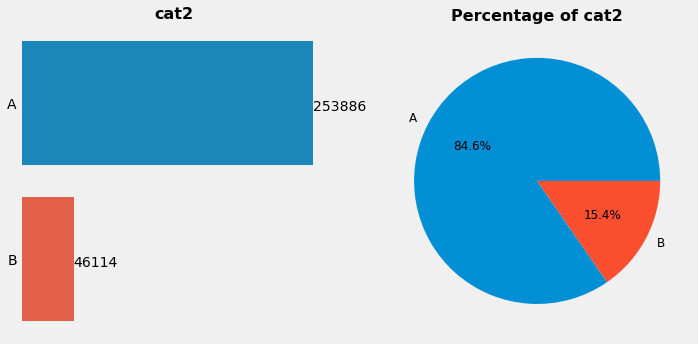

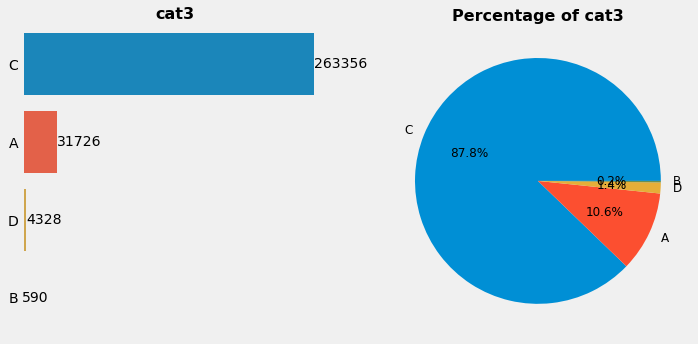

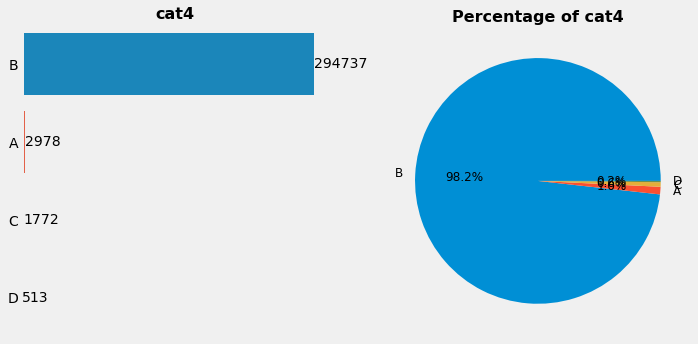

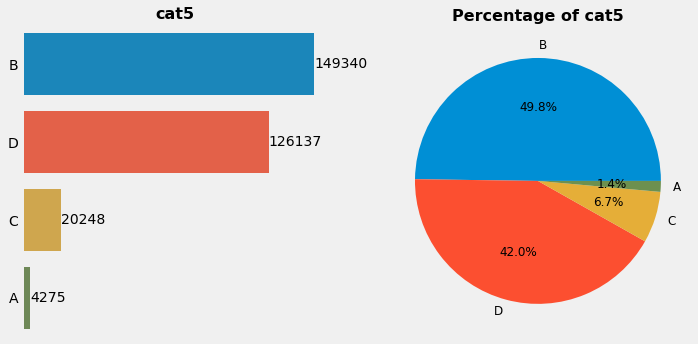

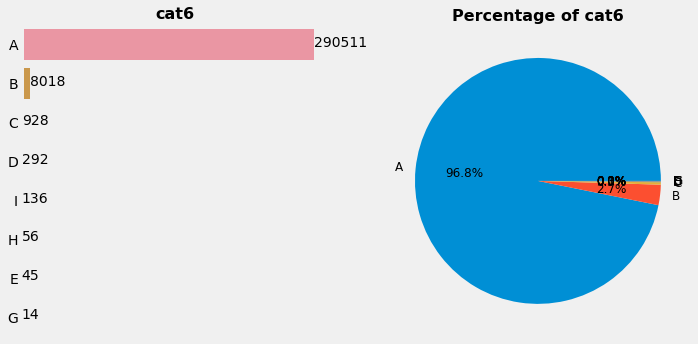

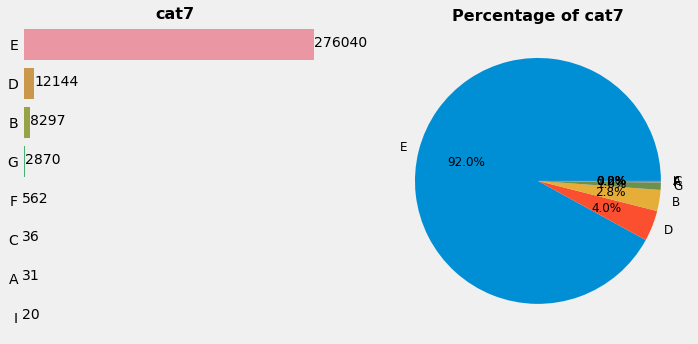

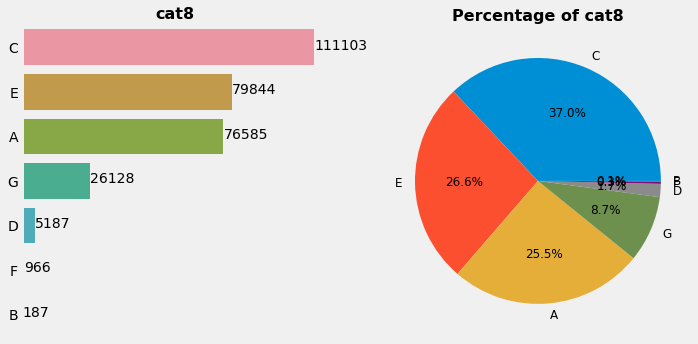

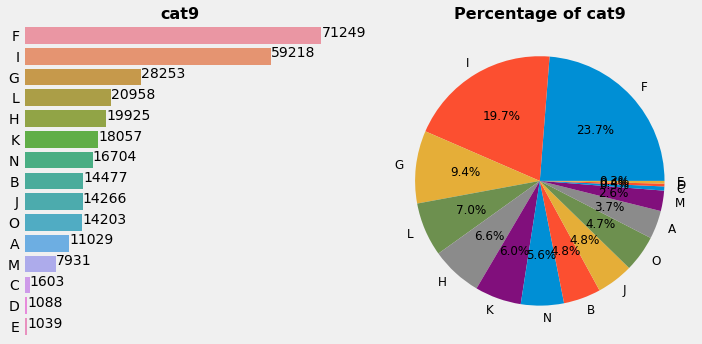

In [20]:
# Looping for countplot
for col in cats:
    plt.figure(figsize=(20, 5))
    # Countplot
    plt.subplot(141);
    ax = sns.countplot(y = train[col], order=train[col].value_counts().index);
    
    for p in ax.patches:
        value = format(p.get_width(), '.0f') 
        x = p.get_x()+10 + p.get_width() 
        y = p.get_y() + p.get_height() / 2 + 0.05
        ax.annotate(value, (x, y), size = 14)
        plt.xlabel('')
    plt.ylabel('')
    plt.xticks([],[])
    plt.title(col, size = 16, weight = 'bold')
    plt.tight_layout();
    
# Pie chart
    plt.subplot(142);
    train[col].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize': 12}); 
    plt.title('Percentage of '+col, size = 16, weight = 'bold')
    plt.ylabel('');

<font size ='4'>**Summary :**</font>  
- `cat0`, `cat1`, & `cat2` have 2 unique values, letter A & B. Letter **A** is the most dominant in the three columns.
- `cat3`, `cat4`, & `cat5` have 4 unique values, letter A, B, C, & D. Letter **B** is the most dominant in `cat4`, & `cat5`, while letter C in `cat3`.
- `cat6`, & `cat7` have 8 unique values, but there is a letter different. `cat6` doesn't have letter *F* but has letter *H* and vice versa.
- `cat8` has 7 unique values, letter A, B, C, D, E, F, & G. Letter **C** is the most dominant.
- `cat9` has 15 uniques values which is high cardinality.

## 2.8. Multivariate Analysis

### 2.8.1. Heatmap Correlation

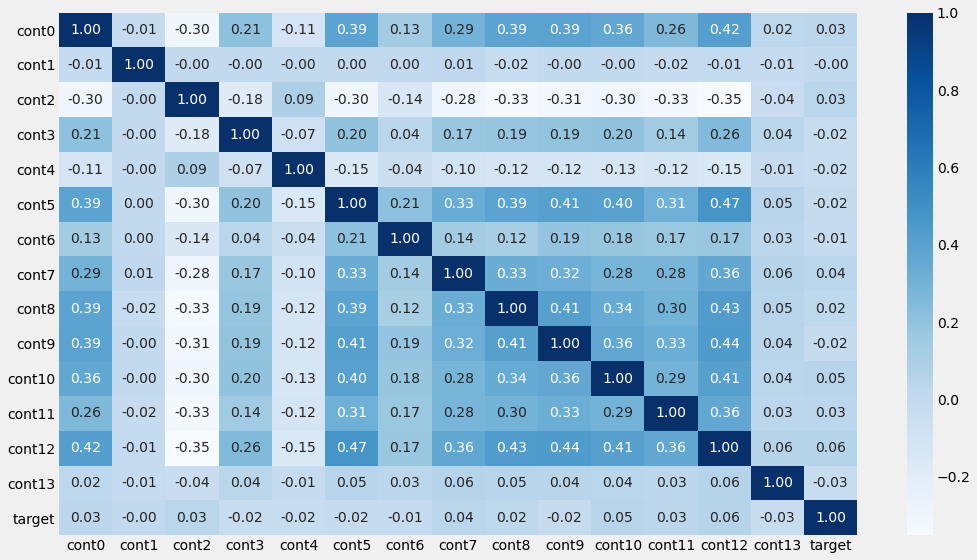

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train[nums].corr(), annot = True, cmap = 'Blues', fmt = '.2f');
plt.tight_layout()

<font size ='4'>**Summary :**</font>  
- None of numeric features have high correlation with the target.
- There is no strong correlation between one numeric feature and another, some numeric features have moderate correlation, such as `cont0`, `cont5`, `cont8`, `cont9`, & `cont10` have positive correlation with `cont12.

### 2.8.2. Pairplot

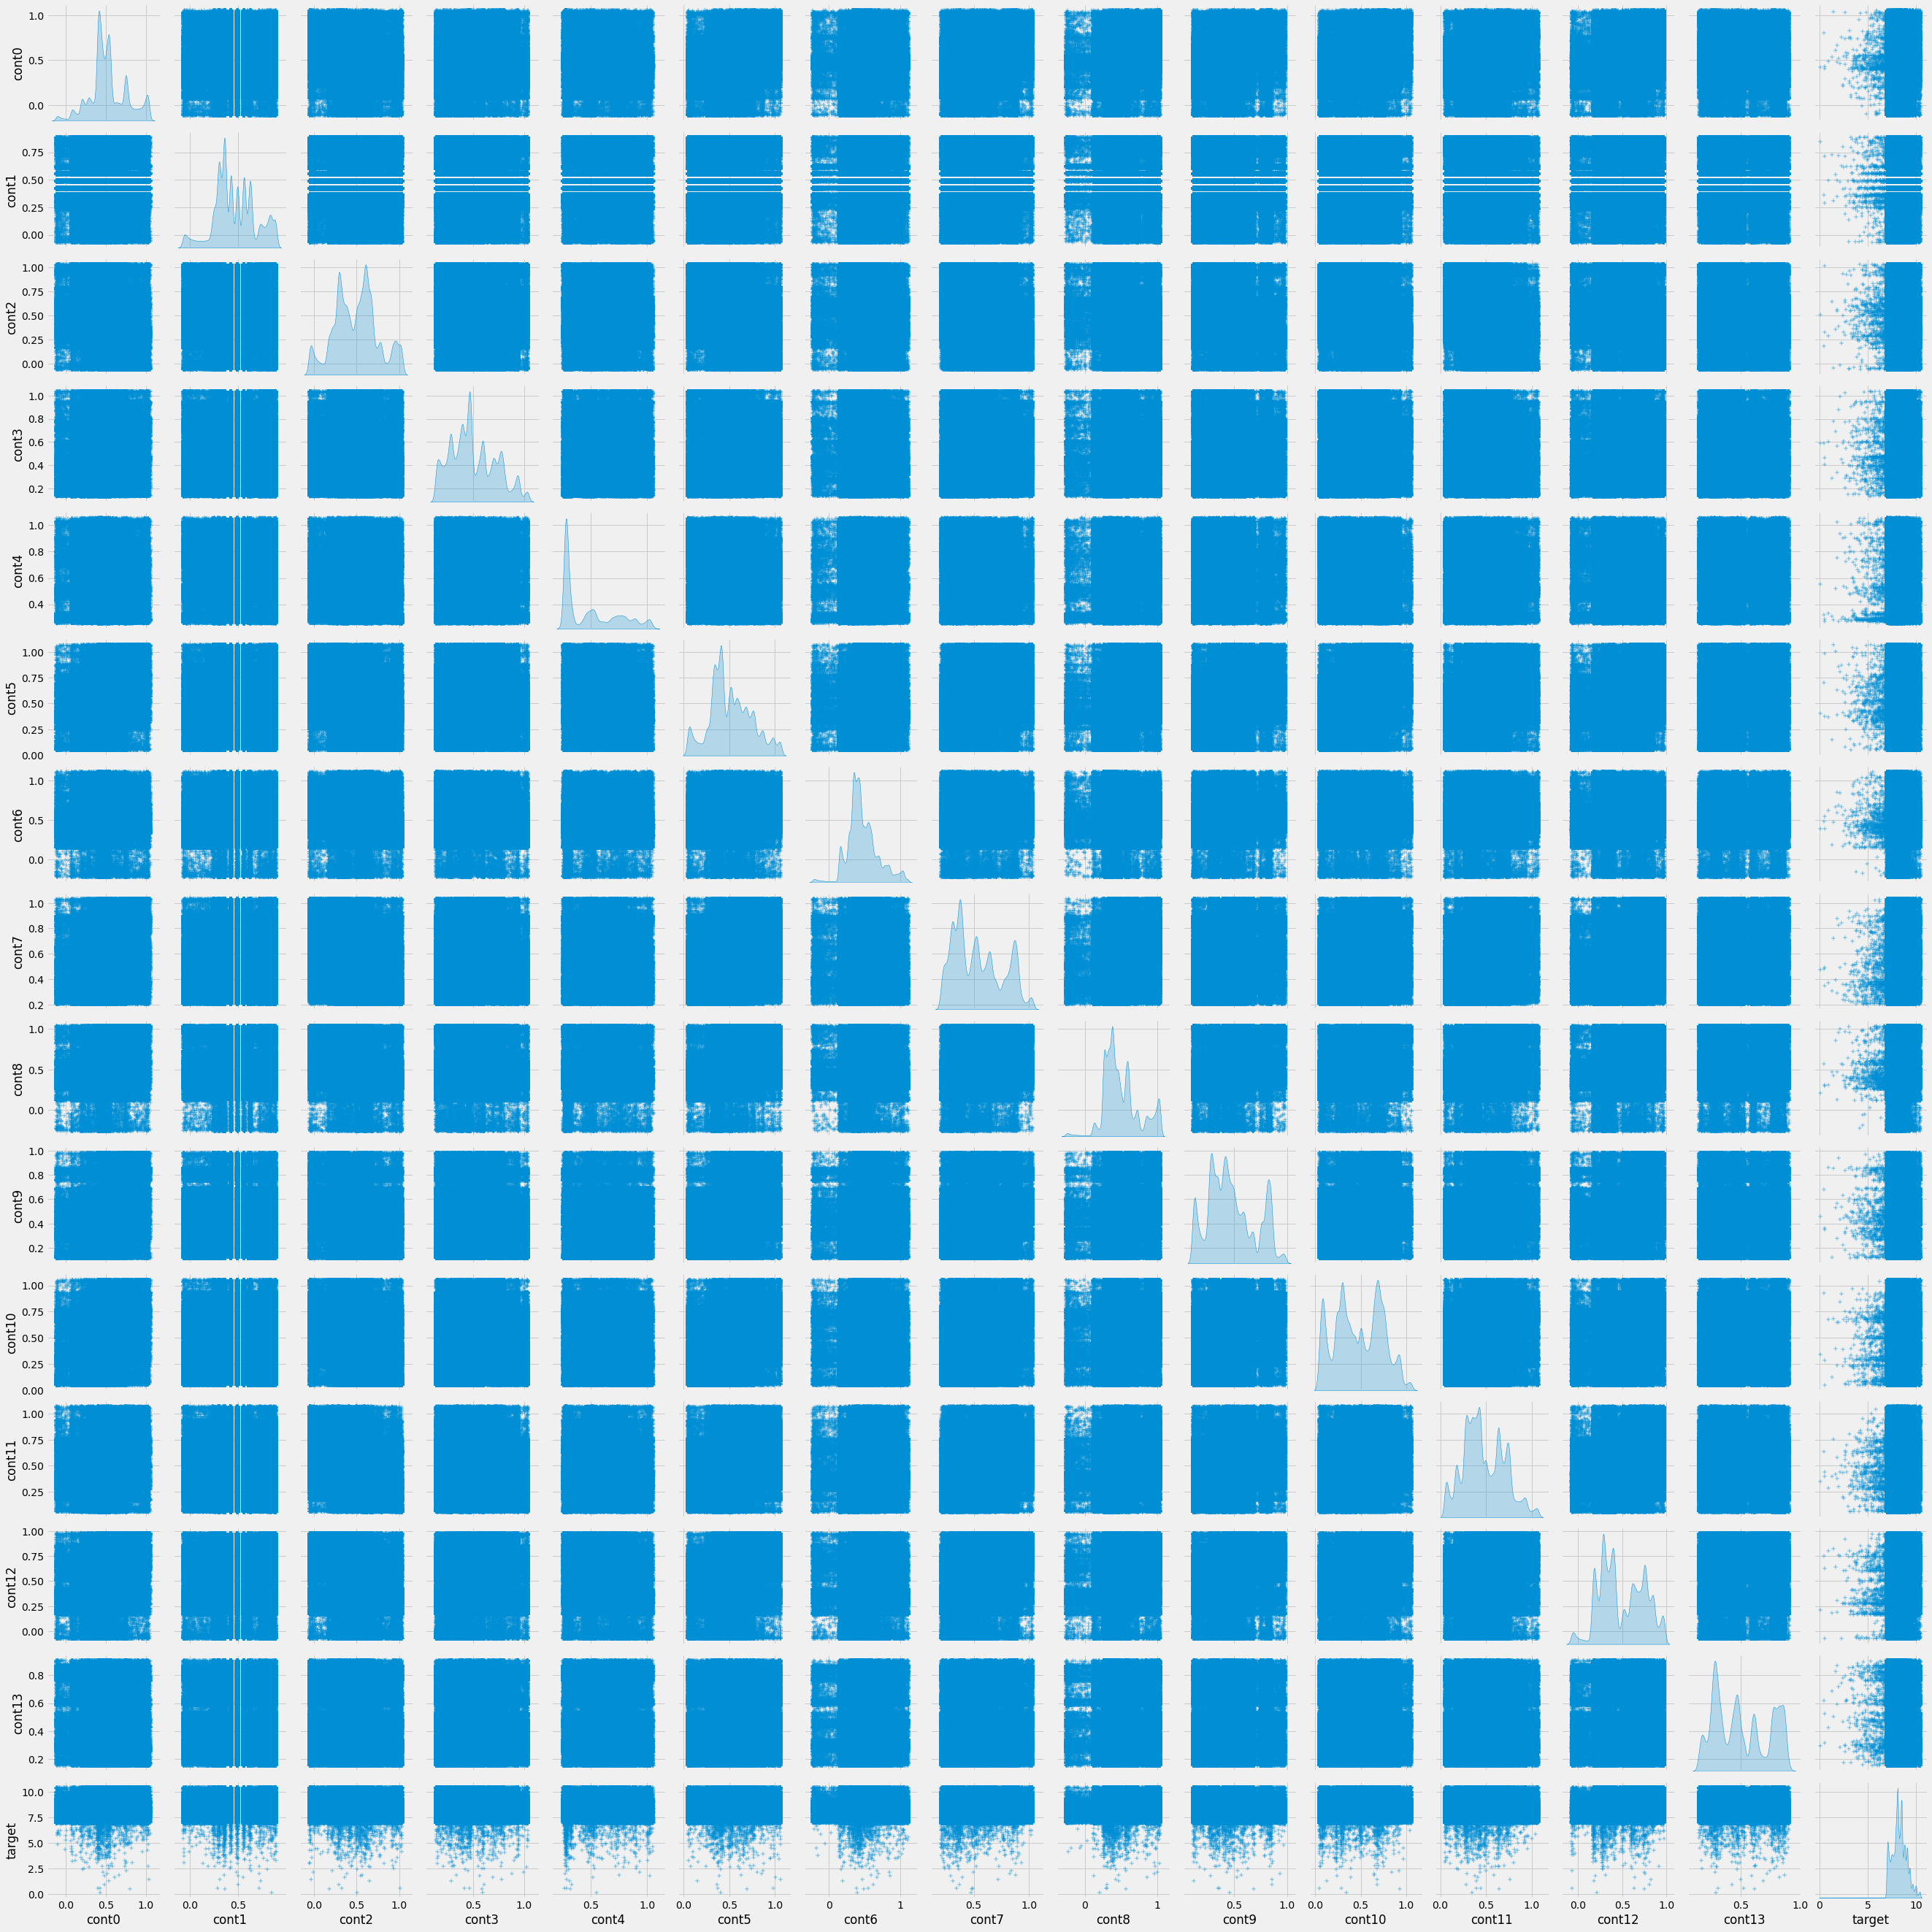

In [22]:
sns.pairplot(train[nums], markers = '+', diag_kind = 'kde');

<font size ='4'>**Summary :**</font>  
- The visualization above clearly shows that no linear correlation between the numeric features and atrget as well. We can't see the patterns.

### 2.8.3. Strip Plot

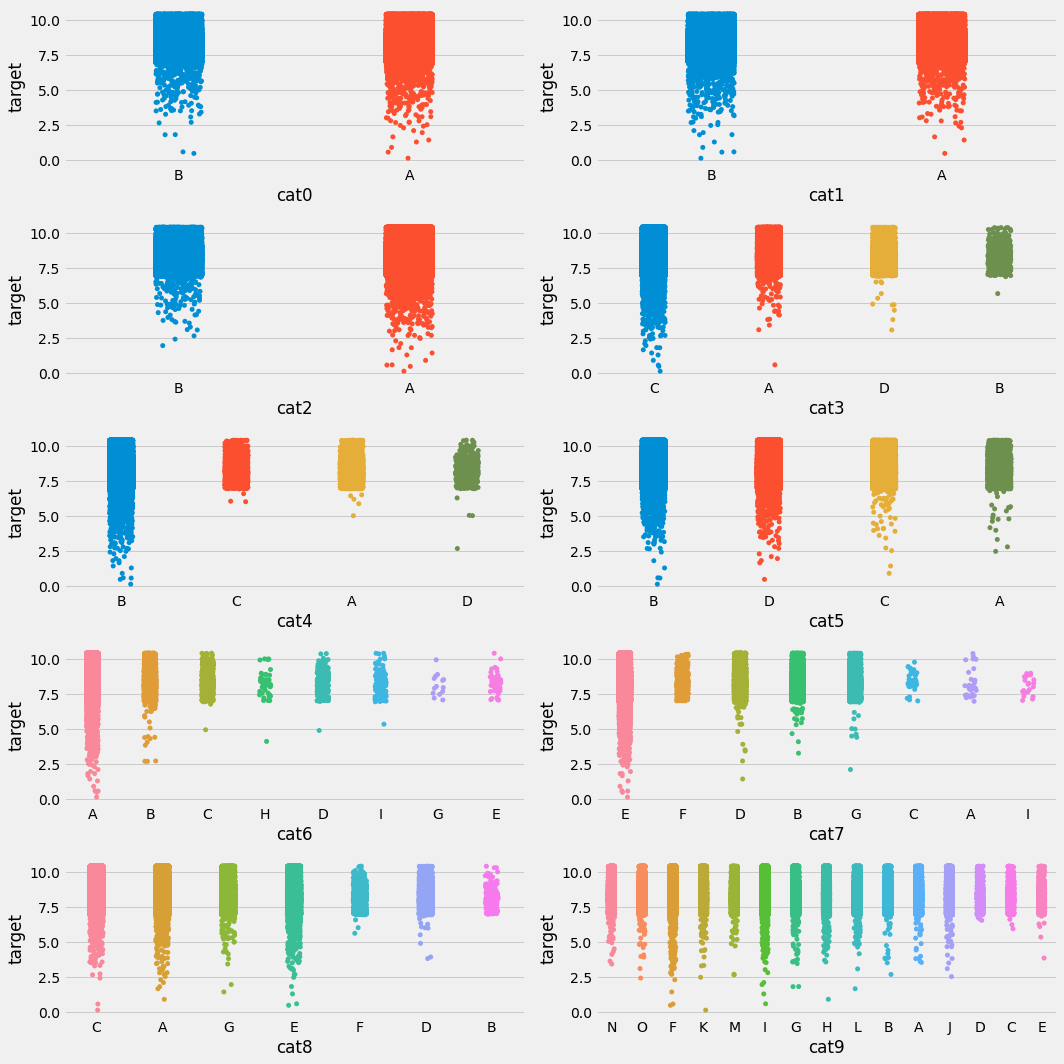

In [23]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(cats)): 
    ax = fig.add_subplot(5, 2, i+1) 
    sns.stripplot(ax=ax, data=train, x=cats[i], y='target') 
    plt.tight_layout() # layout

    if i != 0: plt.close(i+1) # close figure 

    plt.close(len(cats) + 1) # close figure 

# 3. Data Pre Processing

In [24]:
tr = train.copy()
ts = test.copy()

## 3.1. Data Cleaning  
<font size='3'>Maybe I just wanna drop column `id` in this process, because luckily the data doesn't have missing values and duplicated values.

### 3.1.1. Drop Irrelevant Features

In [25]:
tr.drop('id',1, inplace=True)
ts.drop('id',1, inplace=True)

## 3.2. Feature Engineering 


### 3.2.1. Ordinal Encoding

In [26]:
# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
tr[cats] = ordinal_encoder.fit_transform(tr[cats])
ts[cats] = ordinal_encoder.transform(ts[cats])

# 4. Modelling

## 4.1. Separate Train & Test Dataset

In [27]:
X = tr.iloc[:,0:24]
y = tr.iloc[:, 24]
X_test = ts.copy()

## 4.2. Cross Validation & Predict The Model

In [28]:
# Inititate model with the parameter
model = XGBRegressor(learning_rate = 0.05,
                     max_depth = 4,
                     min_child_weight = 5,
                     reg_alpha = 25.5,
                     reg_lambda = 35.6,
                     subsample = 0.7,
                     gamma = 0.05,
                     n_estimators = 10000,
                     colsample_bytree = 0.5,
                     random_state=5)

# Initiate KFold for cross validation the model
kfold = KFold(n_splits=6, shuffle=True, random_state=42)
feature_list_X = X.columns.tolist()
predictions = 0
average_rmse = 0

# Create an iterative process to validation the model
for folds, (train_index, valid_index) in enumerate(kfold.split(X)):
    # split the train data for validation 
    X_train = X.iloc[train_index][feature_list_X]
    X_valid = X.iloc[valid_index][feature_list_X]
    y_train = y.iloc[train_index]
    y_valid = y.iloc[valid_index]
    
    # fitting the model
    model.fit(X_train, y_train,
             verbose = False,
             eval_set = [(X_train, y_train), (X_valid, y_valid)],
             eval_metric = "rmse",
             early_stopping_rounds = 150)
    
    # Evaluate the model using RMSE
    valid_pred = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, valid_pred, squared=False)
    print('K-',folds,'with RMSE:', rmse)

    # Predict the model using the average
    predictions += model.predict(X_test) / 6

K- 0 with RMSE: 0.7167723208733362
K- 1 with RMSE: 0.7151161389082291
K- 2 with RMSE: 0.7208636737405636
K- 3 with RMSE: 0.717153626134054
K- 4 with RMSE: 0.7173336805822986
K- 5 with RMSE: 0.7172870529855728


In [29]:
output = pd.DataFrame({'id': test.id, 'target': predictions})
output.to_csv('my_submission_XGB_Tuned_34.csv', index=False)
print("My submission was successfully saved!")

My submission was successfully saved!
